In [12]:
import ht 
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex

- **Longitud del lado del cubo (D):** 1 metro
- **Temperatura de la pared (\(T_w\)):** 600 °C (convertir a Kelvin si es necesario)
- **Temperatura del gas (\(T_g\)):** 1,400 °C (convertir a Kelvin si es necesario)
- **Emisividad de la pared (\(e_w\)):** 0.9


In [23]:
sigma = 5.670374419e-8  # Constante de Stefan-Boltzmann [W/m²K⁴]
# Dimensiones y propiedades iniciales
longitud_lado_cubo = 1  # en metros
Area_cubo = longitud_lado_cubo**2*6
temperatura_pared_C = 600  # en grados Celsius
temperatura_gas_C = 1400  # en grados Celsius
emisividad_pared = 0.9

# Conversión de temperaturas a Kelvin
temperatura_pared_K = temperatura_pared_C + 273.15
temperatura_gas_K = temperatura_gas_C + 273.15

#
m_H2O = 0.11
m_CO2 = 0.10
p_total = 101.3e3
p_H2O = p_total*m_H2O
p_CO2 = p_total*m_CO2

# Mostrar las variables
print(f"Longitud del lado del cubo: {longitud_lado_cubo} m")
print(f"Temperatura de la pared: {temperatura_pared_C} °C ({temperatura_pared_K} K)")
print(f"Temperatura del gas: {temperatura_gas_C} °C ({temperatura_gas_K} K)")
print(f"Emisividad de la pared: {emisividad_pared}")


Longitud del lado del cubo: 1 m
Temperatura de la pared: 600 °C (873.15 K)
Temperatura del gas: 1400 °C (1673.15 K)
Emisividad de la pared: 0.9


In [24]:
s_eq = 0.9*4*longitud_lado_cubo**3/(longitud_lado_cubo**2*6)

pCO2_seq = p_CO2*s_eq/101.3e3
pH2O_seq = p_H2O*s_eq/101.3e3

pH2O_seq,pCO2_seq

(0.066, 0.06)

In [25]:
eps_CO2 = 0.063
eps_H2O = 0.055
delta_eps = 0.005


In [31]:
eps_gas = eps_CO2 + eps_H2O - delta_eps
alpha_gas = (temperatura_gas_K/temperatura_pared_K)**0.65*eps_gas
display (Latex(f'$\\varepsilon_{{gas}} = {eps_gas:.2f} $'))


Q_w = Area_cubo*sigma*(temperatura_gas_K**4*eps_gas-temperatura_pared_K**4*alpha_gas)/(1-(1-emisividad_pared)*(1-eps_gas))
display (Latex(f'Calor Intercambiado $Q_W = {Q_w*1e-3:.1f} $kW'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

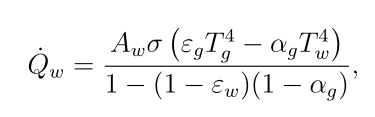

In [4]:
# Importar Pint y crear un registro de unidades
from pint import UnitRegistry

ureg = UnitRegistry()
Q_ = ureg.Quantity  # Para simplificar la creación de cantidades

# Dimensiones y propiedades iniciales con unidades
longitud_lado_cubo = Q_(1, "meter")  # Longitud del lado del cubo
temperatura_pared = Q_(600, "degC")  # Temperatura de la pared
temperatura_gas = Q_(1400, "degC")   # Temperatura del gas
emisividad_pared = 0.9  # Sin unidades

# Convertir temperaturas a Kelvin
temperatura_pared_K = temperatura_pared.to("kelvin")
temperatura_gas_K = temperatura_gas.to("kelvin")

# Mostrar las variables con sus unidades
print(f"Longitud del lado del cubo: {longitud_lado_cubo}")
print(f"Temperatura de la pared: {temperatura_pared} ({temperatura_pared_K})")
print(f"Temperatura del gas: {temperatura_gas} ({temperatura_gas_K})")
print(f"Emisividad de la pared: {emisividad_pared}")


Longitud del lado del cubo: 1 meter
Temperatura de la pared: 600 degree_Celsius (873.15 kelvin)
Temperatura del gas: 1400 degree_Celsius (1673.15 kelvin)
Emisividad de la pared: 0.9
